### 数据生成

In [2]:
import numpy as np
import torch

# 设置随机数种子，使得每次运行代码生成的数据相同
np.random.seed(42)

# 生成随机数据，w为2，b为1
x = np.random.rand(100, 1)
y = 1 + 2*x + 0.1 * np.random.randn(100, 1)

In [16]:
# 将数据转换为 pytorch tensor
x_tensor = torch.from_numpy(x).float()
y_tensor = torch.from_numpy(y).float()

### 设置超参数

In [6]:
learning_rate = 0.1
num_epochs = 1000

### 初始化参数

In [11]:
w = torch.randn(1, requires_grad = True)
b = torch.zeros(1, requires_grad = True)

### 初始化训练

In [13]:
for epoch in range(num_epochs):
    y_pred = x_tensor * w + b
    
    loss = ((y_pred - y_tensor) ** 2).mean()
    
    loss.backward()
    
    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad
        
        w.grad.zero_()
        b.grad.zero_()
        
print('w:', w)
print('b:', b)

w: tensor([1.9540], requires_grad=True)
b: tensor([1.0215], requires_grad=True)


### 可视化

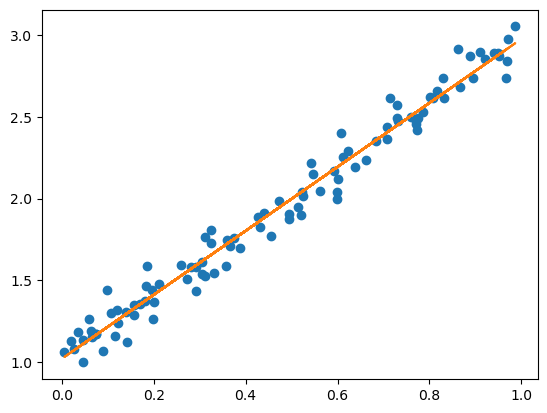

In [15]:
import matplotlib.pyplot as plt

plt.plot(x, y, 'o')
plt.plot(x_tensor.numpy(), y_pred.detach().numpy())
plt.show()

### pytorch 模型实现

In [20]:
import numpy as np
import torch
import torch.nn as nn

# 设置随机数种子，使得每次运行代码生成的数据相同
np.random.seed(42)

# 生成随机数据
x = np.random.rand(100, 1)
y = 1 + 2 * x + 0.1 * np.random.randn(100, 1)

# 将数据转换为 pytorch tensor
x_tensor = torch.from_numpy(x).float()
y_tensor = torch.from_numpy(y).float()

# 设置超参数
learning_rate = 0.1
num_epochs = 1000

input_dim = 1
output_dim = 1

model = nn.Linear(input_dim, output_dim)

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    y_pred = model(x_tensor)
    
    loss = criterion(y_pred, y_tensor)
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
print('w: ', model.weight.data)
print('b: ', model.bias.data)

w:  tensor([[1.9540]])
b:  tensor([1.0215])
